In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import hickle as hkl
from torch.nn import Softmax

from InflGame.utils.general import *
import InflGame.domains.rd as rd
from InflGame.utils.data_management import *

from InflGame.MARL.MARL_plots import *
from InflGame.MARL.sync_game import influencer_env_sync
from InflGame.MARL.IQL_sync import IQL_sync
from InflGame.MARL.utils.IQL_utils import *
from InflGame.MARL.utils.MARL_utils import *
from InflGame.MARL.utils.my_parse import add_rl_example_script_args


from InflGame.MARL.utils.experiments import run_experiment


In [10]:
num_agents=5
agent_param = 1 
step = .1
resource ="gauss_mix_2m"
player_id = 0

env_config_main = {"num_agents":num_agents,"parameters":[agent_param],"step_size":step}
configs={"env_config_main":env_config_main}
params=data_parameters(configs=configs,data_type="configs",resource_type=resource)
config_name=data_final_name(data_parameters=params,name_ads=[])
params=data_parameters(configs=configs,data_type="final_positions",resource_type=resource)
data_name=data_final_name(data_parameters=params,name_ads=["test"])
params=data_parameters(configs=configs,data_type="final_mad",resource_type=resource)
data_name2=data_final_name(data_parameters=params,name_ads=["test"])
mean=hkl.load(data_name[0])
mean=torch.tensor(mean)
mad=hkl.load(data_name2[0])
mad=torch.tensor(mad)




In [11]:
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
bin_points=np.linspace(.001, .999, 100)
resource_distribution2=rd.resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

In [12]:
reach_start=0.03
reach_end=.3
refinements=10
infl_cshift=False

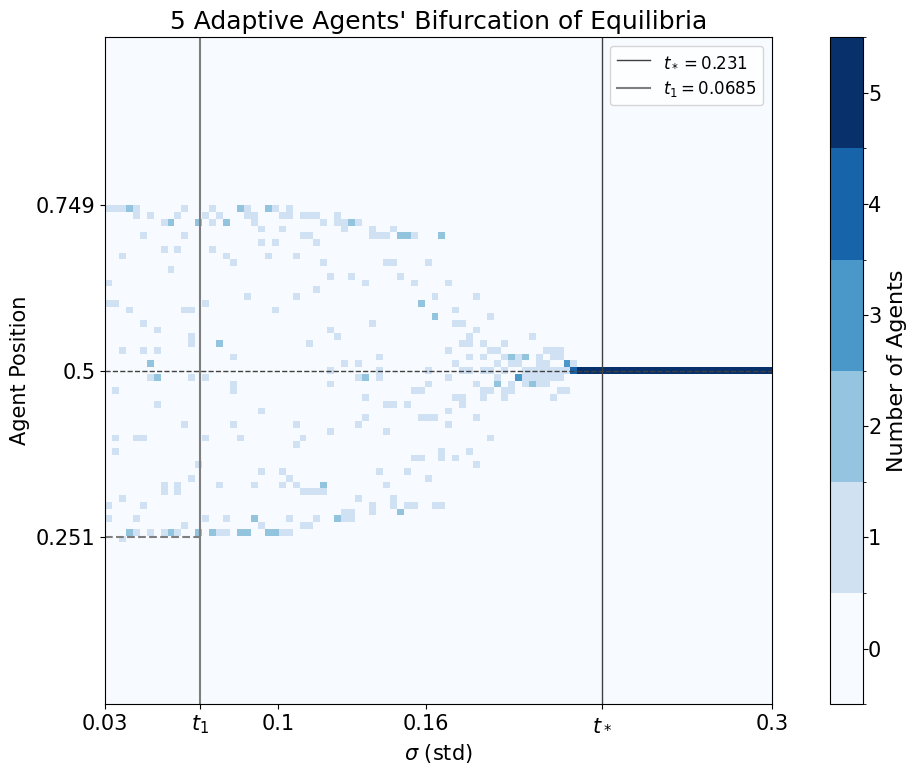

In [13]:
from InflGame.MARL.MARL_plots import bifurcation_over_parameters
bifurcation_over_parameters(positions=mean,
                            reach_parameters=np.linspace(reach_start, reach_end, 96),
                            num_agents=num_agents,
                            bin_points=bin_points,
                            resource_distribution=resource_distribution2,
                            refinements=refinements,plot_type="heat",
                            infl_cshift=infl_cshift,
                            infl_type='gaussian',
                            name_ads=[],
                            title_ads=[],
                            font={'default_size': 15, 'cbar_size': 16, 'title_size': 18, 'legend_size': 12, 'font_family': 'sans-serif'},
                            cbar_config={'center_labels': True, 'label_alignment': 'center', 'shrink': 1.0},
                            save=False,
                            paper_figure={'paper': True, 'section': '7','figure_id':'figure 10'})